# Generate Figure 2A and B
#### This notebook generates the panels associated with Figures 2A and 2B

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


from sparrow import Protein
from finches import Mpipi_frontend
from finches import CALVADOS_frontend

mf = Mpipi_frontend()
cf = CALVADOS_frontend()

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


## Origin

The data in this figure come from this lovely paper from the Rosen lab.

Lin, Y., Currie, S. L. & Rosen, M. K. Intrinsically disordered sequences enable modulation of protein phase separation through distributed tyrosine motifs. J. Biol. Chem. 292, 19110–19120 (2017). Fig S5

Specifically, we excised the data from Fig. S5 in this paper, shown below for completeness

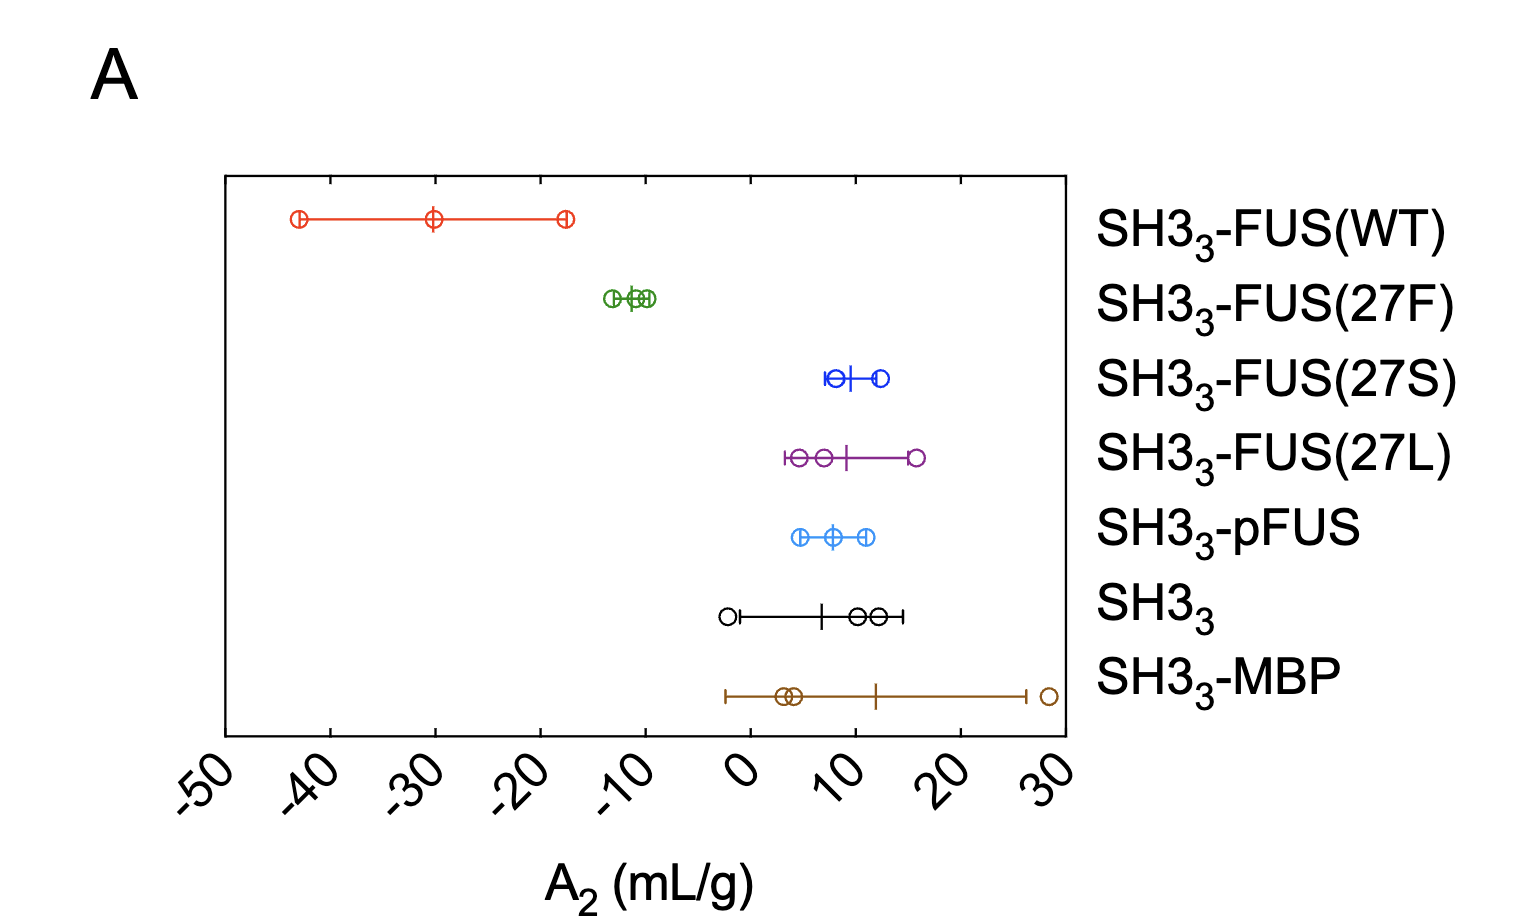

In [2]:
A2_data = {}

# points, lines from figure above
A2_data['wt'] = [[-42.69487435780124, -29.876135413236508, -17.419023945307835],[-42.568153935370695, -29.984511462683265, -17.286023598527787]]
A2_data['27F'] = [[-13.052174369166302, -10.843578886632068, -9.751862849949148],[-12.868118674542558, -11.210961746372654, -9.537791739641039]]
A2_data['27S'] = [[8.066409835731168, 12.337530634665766], [7.067319040555781, 9.504658217667133, 11.92305562759903]]
A2_data['27L'] = [[4.52454707320556, 6.963197603429335, 15.70553711566426], [3.277421122110288, 9.11642484343901, 14.973656373030423]]





In [3]:
# define the sequences we're gonna use for this figure
seqs = {}
fus_wt = 'MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNSSSGGGGGGGGGGNYGQDQSSMSSGGGSGGGYGNQDQSGGGGSGGYGQQDR'

seqs['wt'] = fus_wt
seqs['27F'] = fus_wt.replace('Y','F')
seqs['27S'] = fus_wt.replace('Y','S')
seqs['27L'] = fus_wt.replace('Y','L')



In [5]:
# compute esilon for all those sequences
eps = {}
names = []
for name in seqs:
    s = seqs[name]
    eps[name] = mf.epsilon(s,s)
    names.append(name)
    

In [6]:
eps_mean = []
a2_mean = []
a2_stderr = []
for k in eps:
    eps_mean.append(eps[k])
    a2_mean.append(np.mean(A2_data[k][0]))
    a2_stderr.append(np.std(A2_data[k][0])/np.sqrt(len(A2_data[k][0])))
                    

/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_40031/788056951.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(eps_mean, a2_mean, yerr=a2_stderr, fmt='or', mfc='r',mew=0.5, ms=4,mec='k', capsize=3,capthick=0, lw=0.4, color='k', elinewidth=0.5)


[[1.         0.92932342]
 [0.92932342 1.        ]]


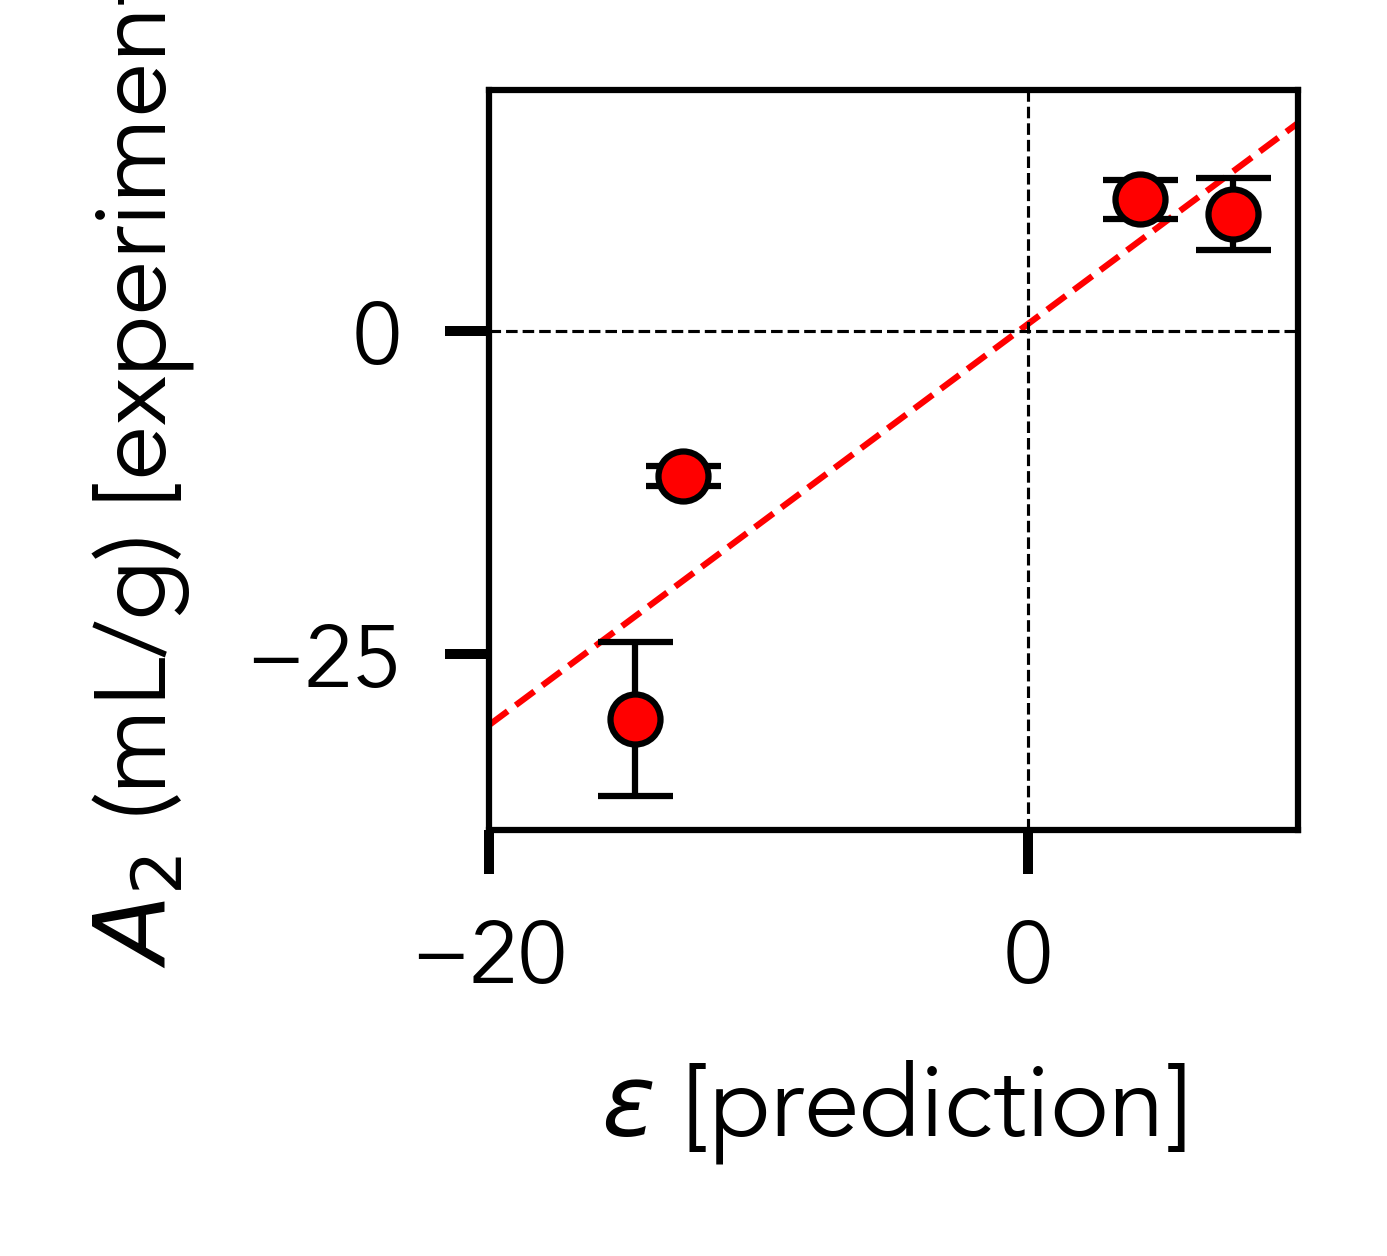

In [7]:
figure(None, (1.7, 1.5), dpi=450)
plt.errorbar(eps_mean, a2_mean, yerr=a2_stderr, fmt='or', mfc='r',mew=0.5, ms=4,mec='k', capsize=3,capthick=0, lw=0.4, color='k', elinewidth=0.5)
ax = plt.gca()
fit_data = np.polyfit(eps_mean, a2_mean, 1)

print(np.corrcoef(eps_mean, a2_mean))
xmin = -20
xmax = 10
xdata = np.arange(xmin, xmax, 0.01)
plt.xlim([xmin, xmax])
#plt.ylim([-32, 25])
plt.plot(xdata, xdata*fit_data[0] + fit_data[1], '--r', linewidth=0.5, zorder=-20)
plt.xlabel(r'$\epsilon$ [prediction]', fontsize=8)
plt.ylabel(r'$A_{2}$ (mL/g) [experiment]', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax.axhline(0,color='k',lw=0.25, ls='--')
ax.axvline(0,color='k',lw=0.25, ls='--')
plt.tight_layout()
plt.savefig('fus_A2.pdf')

(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

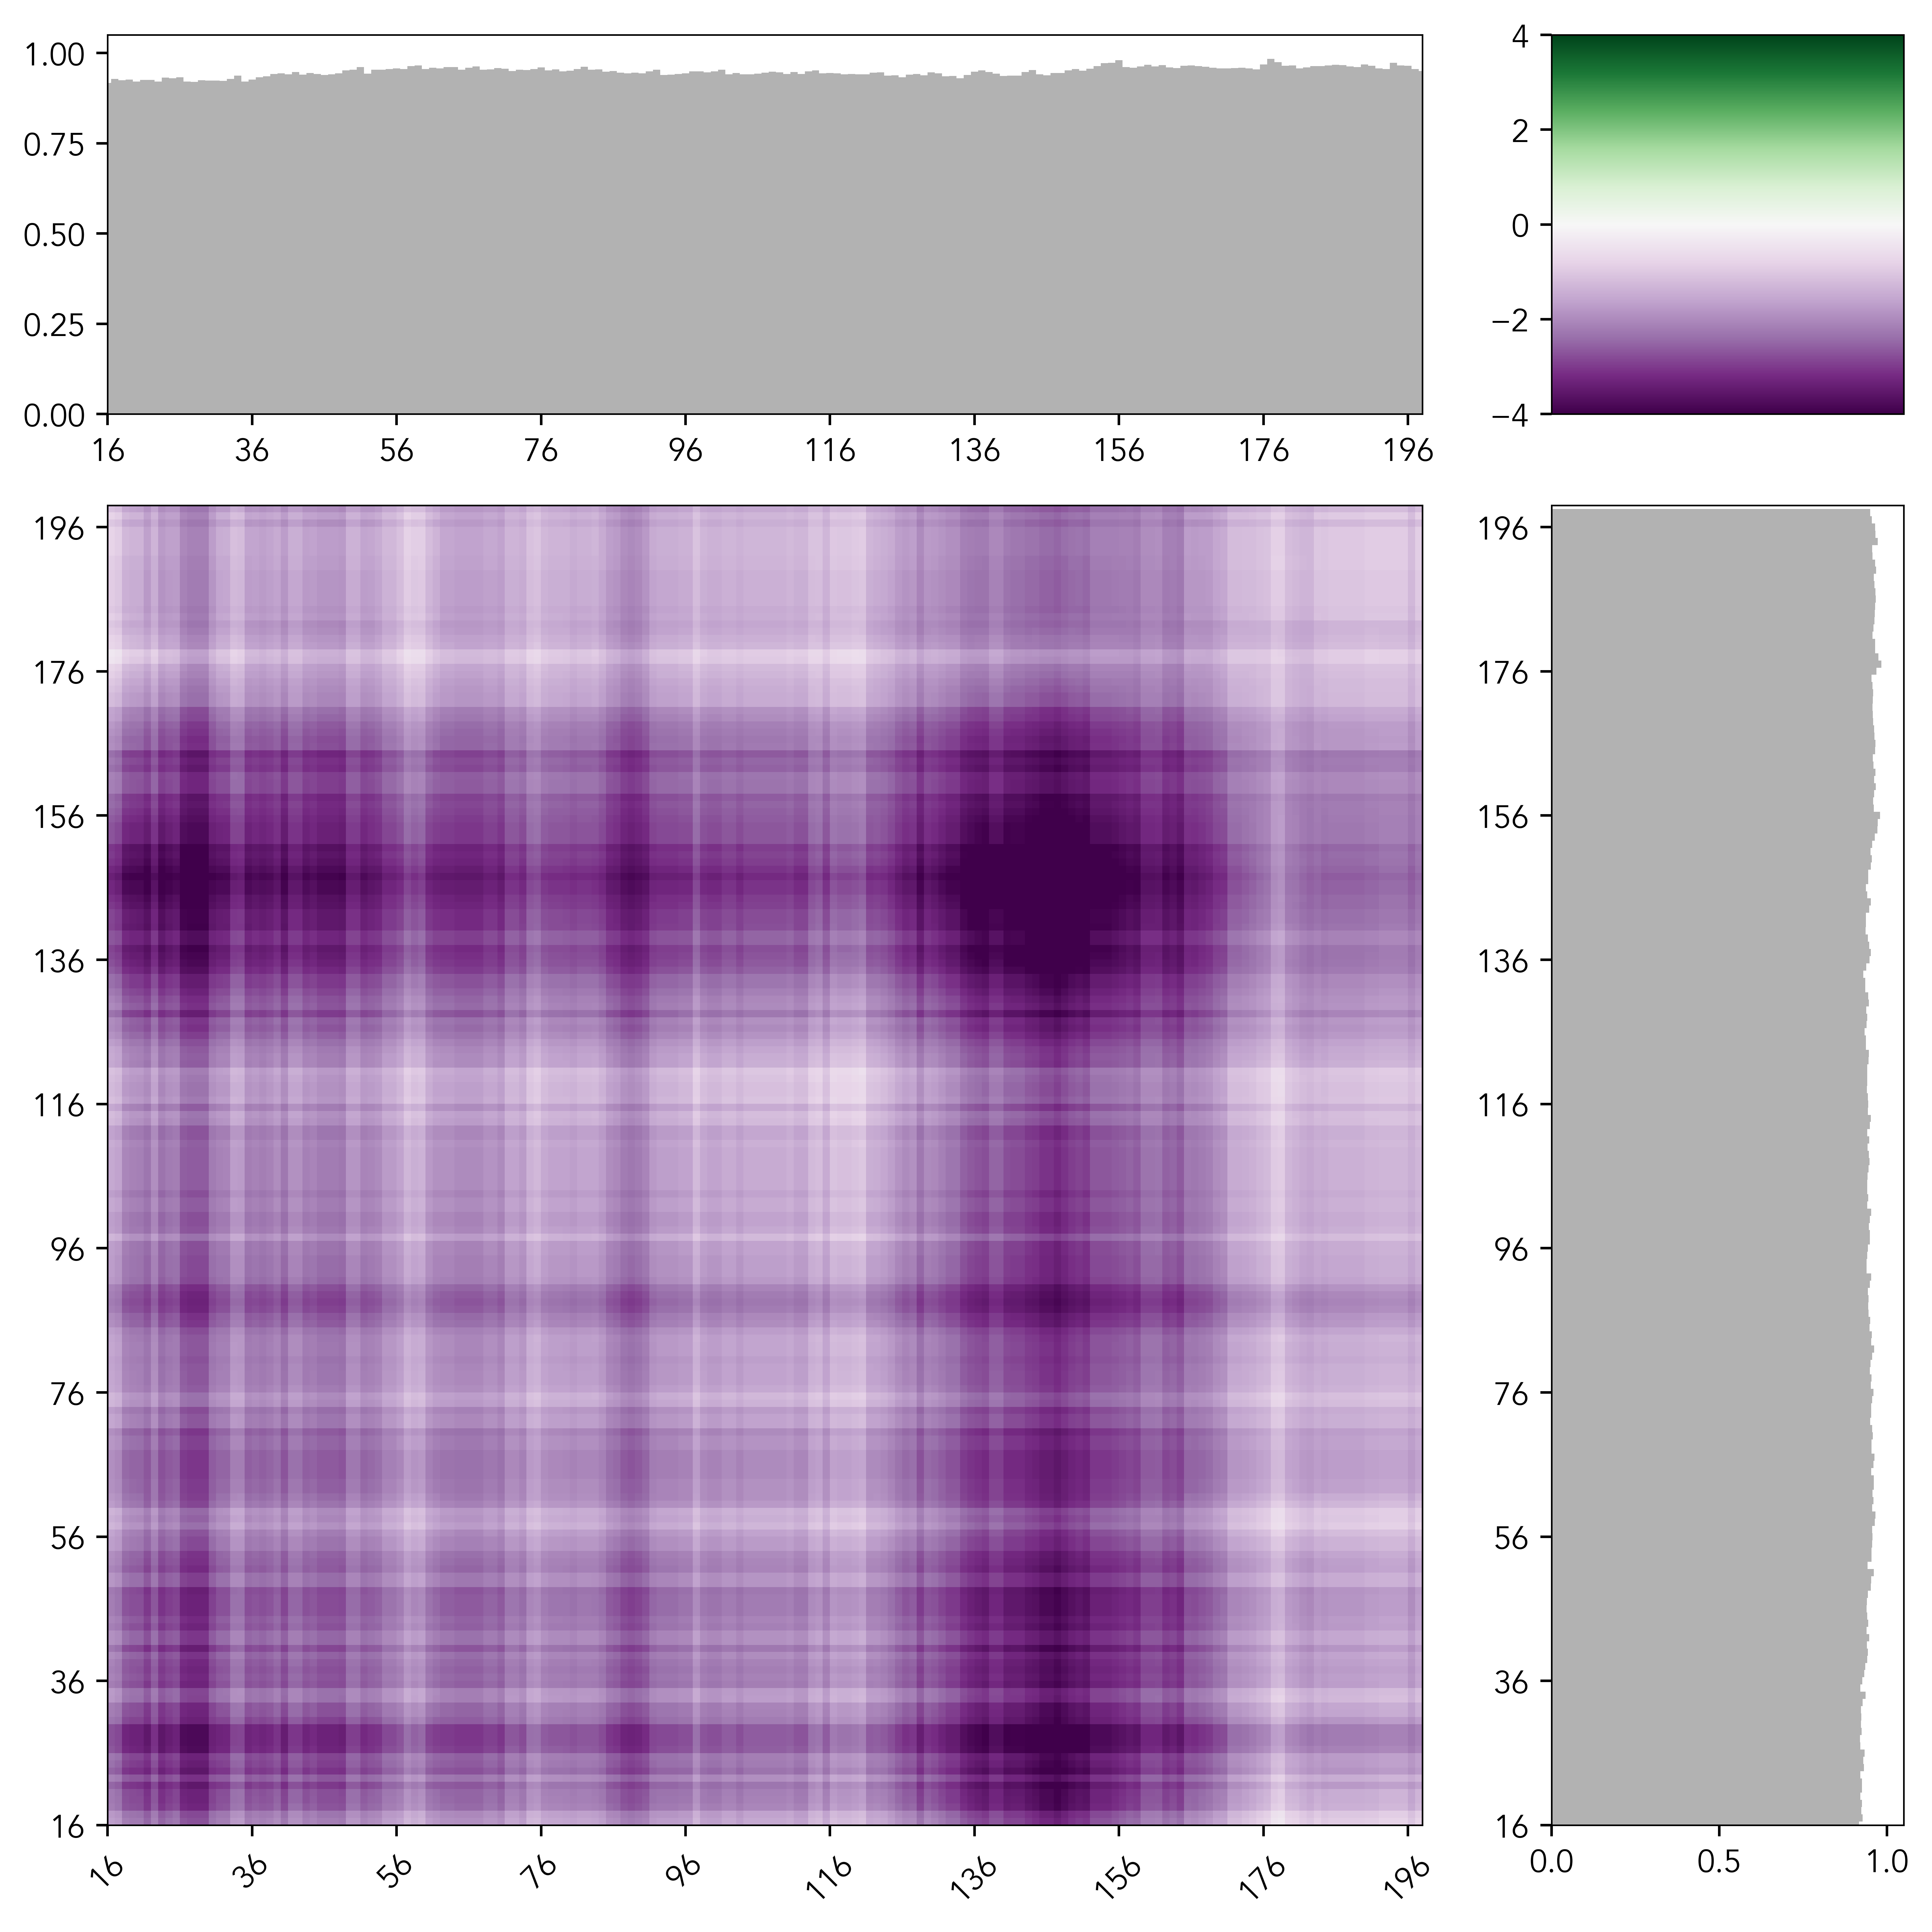

In [8]:
# ploy FUS:FUS intermap
mf.interaction_figure(fus_wt,fus_wt, vmin=-4, vmax=4, tic_frequency=20, fname='fus_wt.pdf')


(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

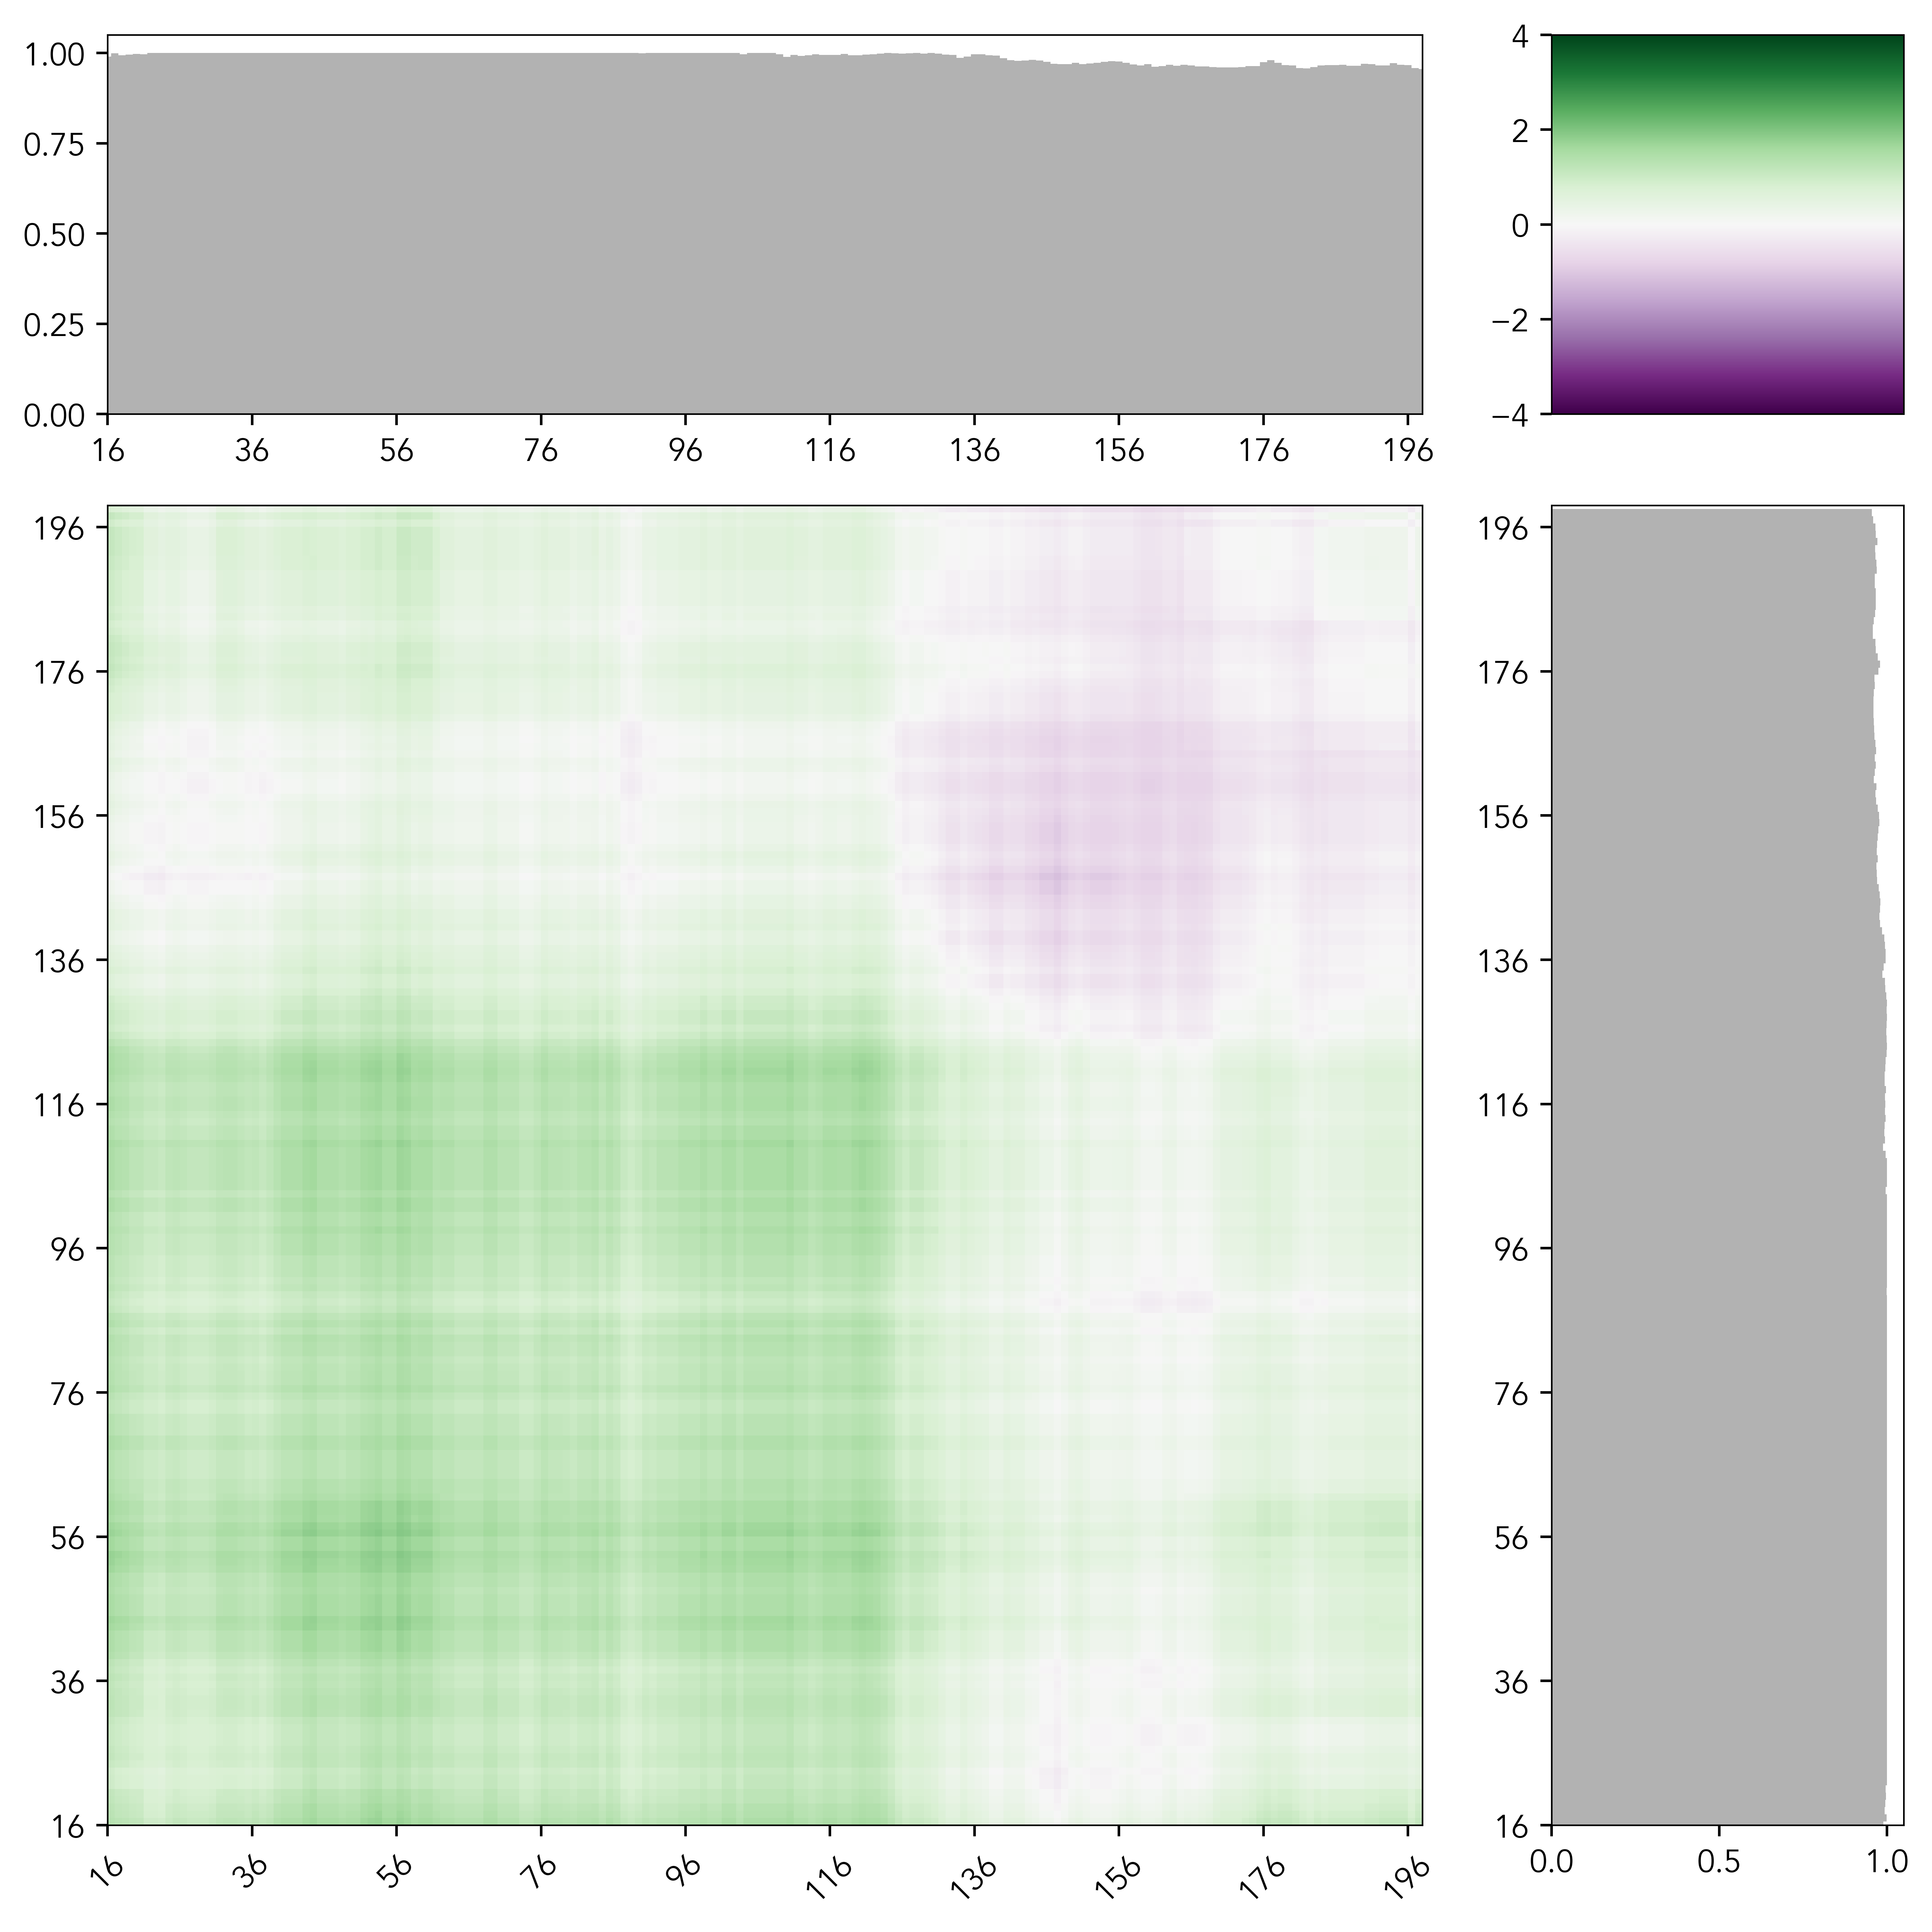

In [9]:
# ploy FUS_27S:FUS_27S intermap
mf.interaction_figure(seqs['27S'],seqs['27S'], vmin=-4, vmax=4, tic_frequency=20, fname='fus_y2s.pdf')